# Regression Techinques to predict house sales in King County, WA

### Installing required packages and loading the libraries

In [ ]:
install.packages("glmnet")
install.packages("plotmo")
install.packages("rpart")
install.packages("rpart.plot")


In [39]:
library(glmnet)
library(plotmo)
library(rpart)
library(rpart.plot)


In [40]:
getwd()

[1] "/Users/sirisadashiva/Desktop/Big_Data_Project"

## I. Data preprocessing

In [41]:
kingcounty <- read.csv("kc_house_data.csv", head=TRUE, sep=",")

#Remove date and id columns as it doesn't contribute to predictions of price
kingcounty <- subset(kingcounty, select=-date)
kingcounty <- subset(kingcounty, select=-id)


### Split data into training set and test set 

In [42]:
#Divide data into training set(80%)  and testing set(20%)
indexes = sample(1:nrow(kingcounty), size= 0.2*nrow(kingcounty))
testset = kingcounty[indexes,]
trainset = kingcounty[-indexes,]

#Convert data into matrix, assign values for x. Assign the value to be predicted to : y 
xkc_train <- model.matrix(price~.-1,data=trainset) 
ykc_train <- trainset$price
xkc_test <- model.matrix(price~.-1,data=testset)
ykc_test <- testset$price


## II. Modeling: Lasso Regression, Ridge Regression and Elastic Net Regression

In [43]:
#measuring MSE
for(i in 0:10){assign(paste("fit",i,sep=""),cv.glmnet(xkc_train,ykc_train,type.measure="mse",alpha=i/10))}

yhat0 <- predict(fit0, s=fit0$lambda.1se, newx=xkc_test)
yhat4 <- predict(fit4, s=fit4$lambda.1se, newx=xkc_test)
yhat10 <- predict(fit10, s=fit10$lambda.1se, newx=xkc_test)

mse0 <- mean((ykc_test-yhat0)^2)
mse4 <- mean((ykc_test-yhat4)^2)
mse10 <- mean((ykc_test-yhat10)^2)



### Plotting MSE 

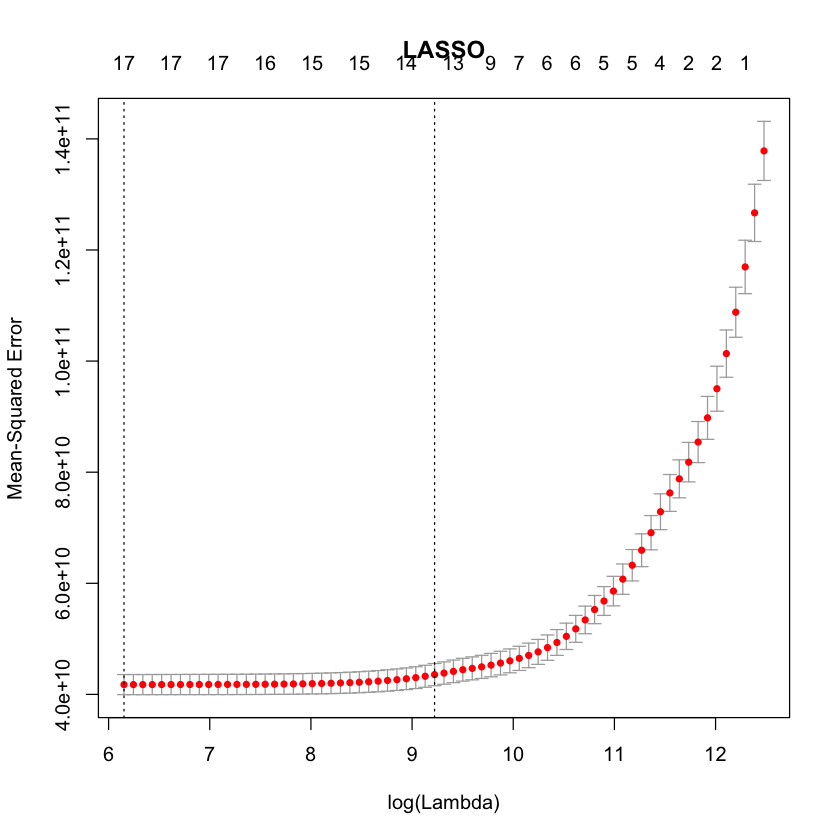

In [45]:
plot(fit10, main="LASSO")


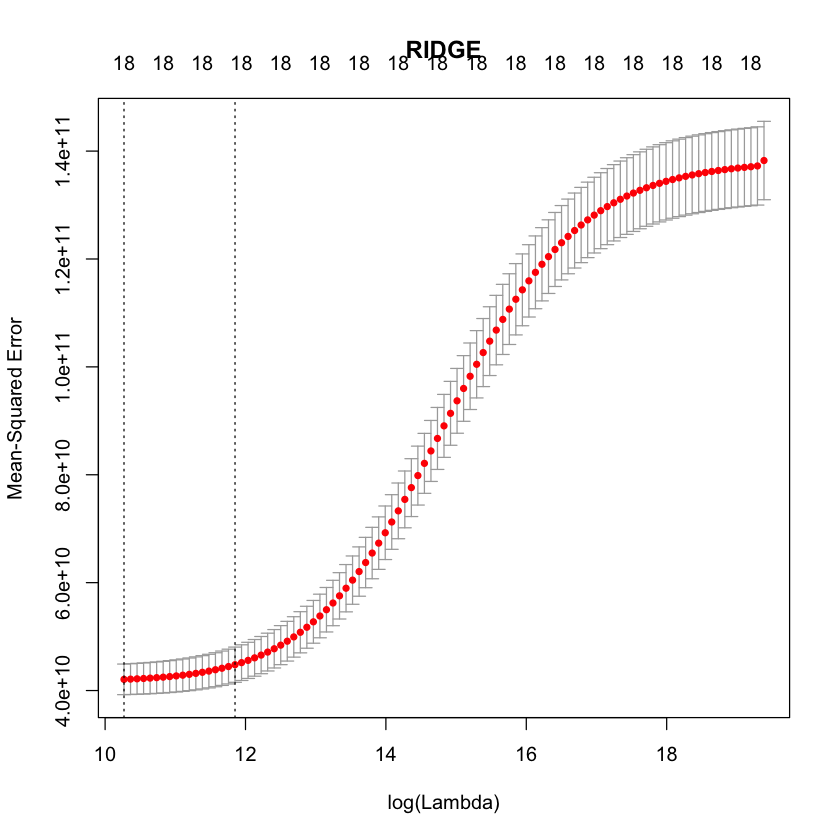

In [46]:
plot(fit0, main="RIDGE")


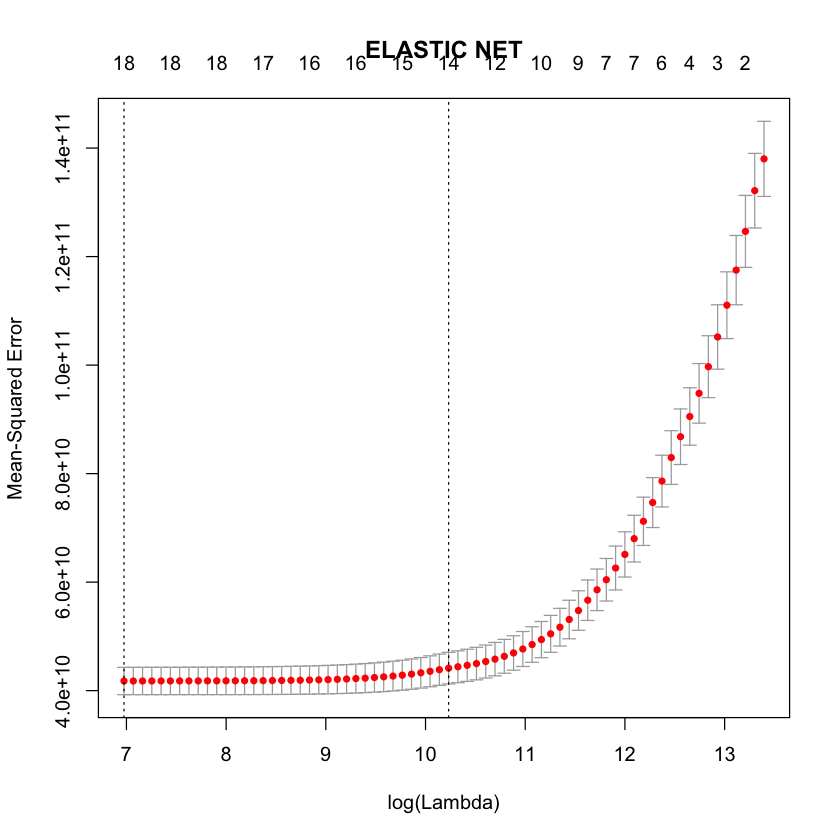

In [47]:
plot(fit4,main="ELASTIC NET")

## III. Visualization

### Lasso

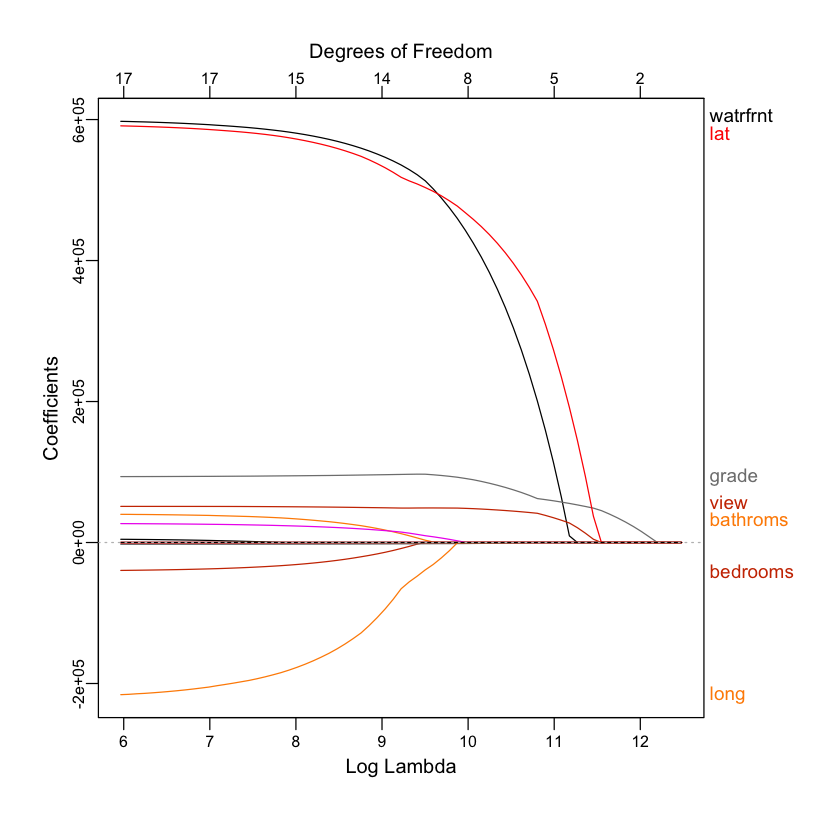

In [48]:
#fit and plot the graph 
fit.lasso <- glmnet(xkc_train, ykc_train, family="gaussian", alpha=1)
plot_glmnet(fit.lasso,xvar="lambda",label=7)

### Ridge 

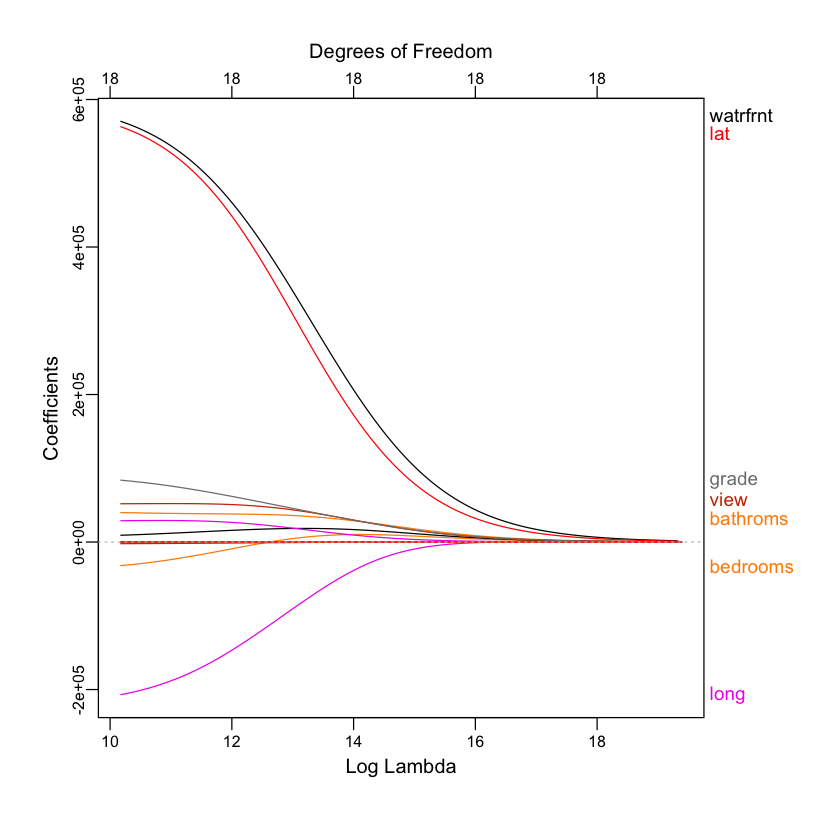

In [49]:
#fit and plot the graph 
fit.ridge <- glmnet(xkc_train, ykc_train, family="gaussian", alpha=0)
plot_glmnet(fit.ridge,xvar="lambda",label=7)

### Elastic Net

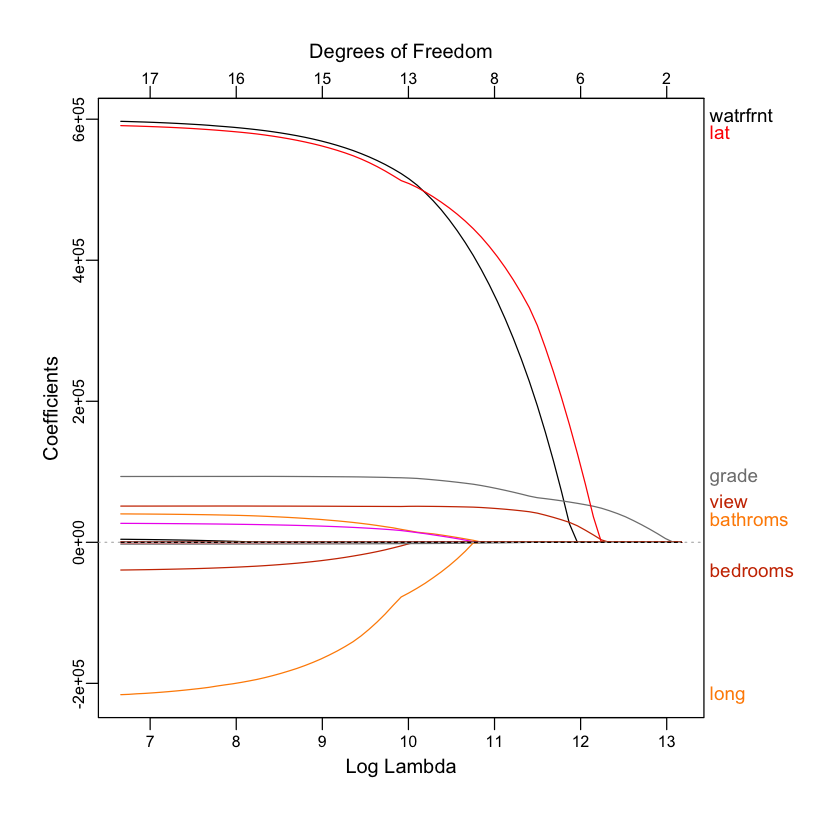

In [50]:
#fit and plot the graph 
fit.elnet <- glmnet(xkc_train, ykc_train, family="gaussian", alpha=0.5)
plot_glmnet(fit.elnet,xvar="lambda",label=7)